Импорт библиотек

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from google.colab import drive
import os

In [39]:
# Монтирование Google Диска по пути /content/drive
drive.mount('/content/drive')

# Путь к нужной папке на Google Диске
folder_path = '/content/drive/My Drive/ML'

# Переход в указанную папку
os.chdir(folder_path)

# Проверка текущей директории
!pwd
!ls

"\n# Монтирование Google Диска по пути /content/drive\ndrive.mount('/content/drive')\n\n# Путь к нужной папке на Google Диске\nfolder_path = '/content/drive/My Drive/ML'\n\n# Переход в указанную папку\nos.chdir(folder_path)\n\n# Проверка текущей директории\n!pwd\n!ls"

Настройка визуализации

In [40]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Загрузка данных

In [41]:
advertising_data = pd.read_csv("Advertising.csv")
heart_data = pd.read_csv("heart.csv")

datasets = {
    "names": ["Advertising", "Heart"],
    "data": [advertising_data, heart_data]
}

Посмотрим на структуру датасетов

In [42]:
print("Advertising dataset:\n")
print(advertising_data.head())
print("\nHeart dataset:\n")
print(heart_data.head())

Advertising dataset:

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Heart dataset:

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [43]:
advertising_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [44]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Меры центральной тенденции


**Выборочное среднее** показывает типичное значение данных.
Важно для понимания, где находится центр распределения данных.
$$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$


**Медиана** представляет собой центральное значение набора данных, упорядоченного по возрастанию.
Она менее чувствительна к выбросам, чем среднее.

**Мода** определяет наиболее часто встречающееся значение в наборе данных.
Это полезно для категориальных данных или случаев.

In [45]:
for name, data in zip(datasets["names"], datasets["data"]):
    print(f"\n{name} dataset - центральные меры:\n")
    print("Среднее значение:\n", data.mean())
    print("Медиана:\n", data.median())
    print("Мода:\n", data.mode().iloc[0])


Advertising dataset - центральные меры:

Среднее значение:
 TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64
Медиана:
 TV           149.75
radio         22.90
newspaper     25.75
sales         12.90
dtype: float64
Мода:
 TV           17.2
radio         4.1
newspaper     8.7
sales         9.7
Name: 0, dtype: float64

Heart dataset - центральные меры:

Среднее значение:
 age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64
Медиана:
 age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal      

# Меры разброса
**Смещенная выборочная дисперсия** показывает, насколько значения отклоняются от среднего значения.
$$\text{Var}(x) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2$$

**Среднеквадратичное отклонение** — это квадратный корень из дисперсии.
Оно имеет ту же размерность, что и сами данные, и помогает понять типичное отклонение от среднего.
$$\text{Std}(x) = \sqrt{\text{Var}(x)}$$

**Минимальное и максимальное значения** полезны для определения диапазона данных.
Они дают информацию о крайних значениях в наборе данных.

**Межквартильный размах** — это разница между 75-м и 25-м процентилями.
Он характеризует разброс центральных 50% данных и полезен для обнаружения выбросов.


In [46]:
for name, data in zip(datasets["names"], datasets["data"]):
    print(f"\n{name} dataset - меры разброса:\n")
    print("Дисперсия:\n", data.var())
    print("Среднеквадратичное отклонение:\n", data.std())
    print("Минимальное значение:\n", data.min())
    print("Максимальное значение:\n", data.max())
    print("IQR:\n", data.quantile(0.75) - data.quantile(0.25))


Advertising dataset - меры разброса:

Дисперсия:
 TV           7370.949893
radio         220.427743
newspaper     474.308326
sales          27.221853
dtype: float64
Среднеквадратичное отклонение:
 TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64
Минимальное значение:
 TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64
Максимальное значение:
 TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64
IQR:
 TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

Heart dataset - меры разброса:

Дисперсия:
 age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target      

# Параметры формы распределений
**Асимметрия** показывает сдвиг распределения относительно среднего.
Положительная асимметрия означает, что хвост распределения длиннее справа, отрицательная — слева.
Это важно для оценки симметричности данных.
$$\text{Skewness}(x) = \frac{E[(x - \bar{x})^3]}{\text{Std}(x)^3}$$

**Эксцесс** характеризует "остроту" пика распределения.
Высокий эксцесс указывает на наличие "тяжелых хвостов", низкий — на более плоское распределение.
$$\text{Kurtosis}(x) = \frac{E[(x - \bar{x})^4]}{\text{Std}(x)^4} - 3$$


In [47]:
for name, data in zip(datasets["names"], datasets["data"]):
    print(f"\n{name} dataset - параметры формы:\n")
    print("Асимметрия:\n", data.skew())
    print("Эксцесс:\n", data.kurtosis())


Advertising dataset - параметры формы:

Асимметрия:
 TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64
Эксцесс:
 TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64

Heart dataset - параметры формы:

Асимметрия:
 age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64
Эксцесс:
 age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64


# Визуализация данных
Гистограммы помогают визуализировать распределение данных, показывая частоту значений в интервалах.
Это важно для первичного анализа и выявления аномалий или выбросов.

**Эмпирическая функция распределения (ECDF)** - приближение теоретической функции распределения, построенное с помощью выборки из него. Показывает накопленную долю данных.
Это полезно для анализа порядковых данных и понимания процентилей.

**Ядерная оценка плотности (KDE)** сглаживает выборочное распределение, давая более ясное представление о форме данных.
Это позволяет увидеть основные особенности распределения.

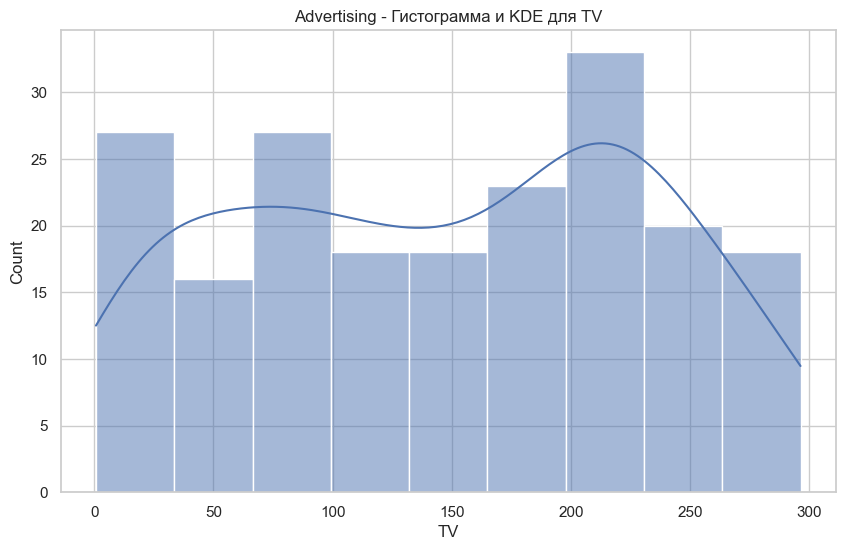

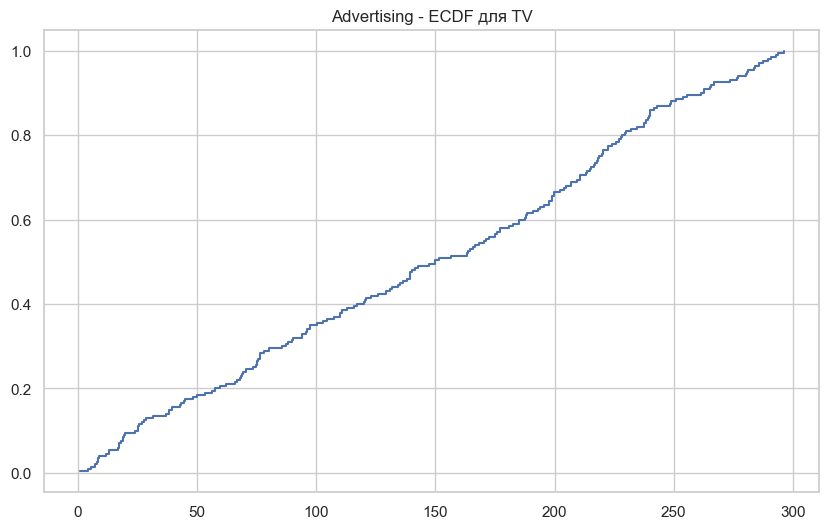

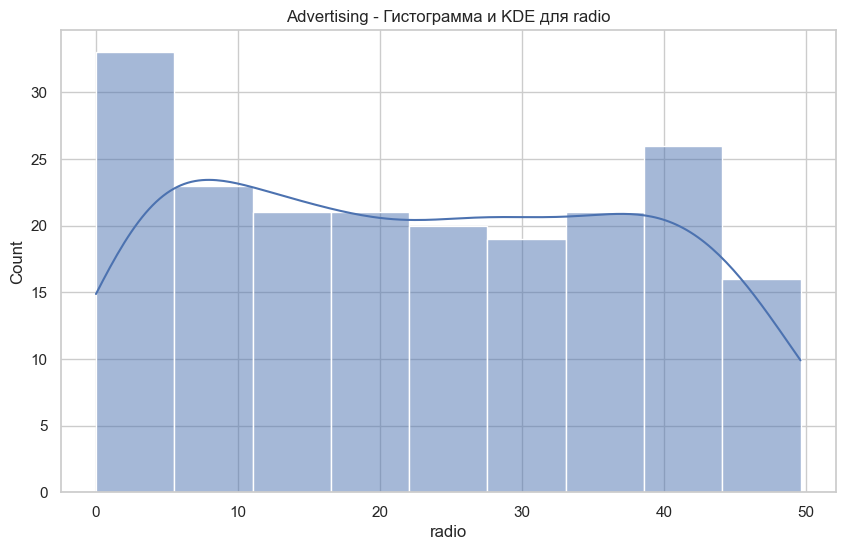

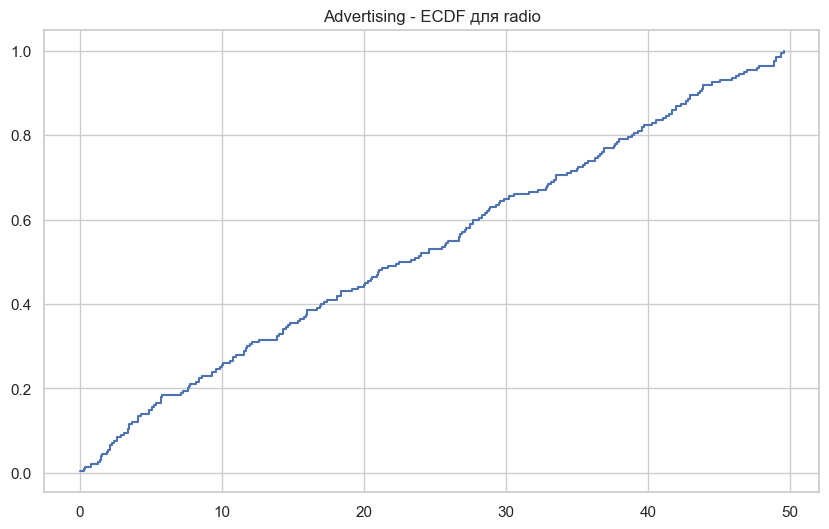

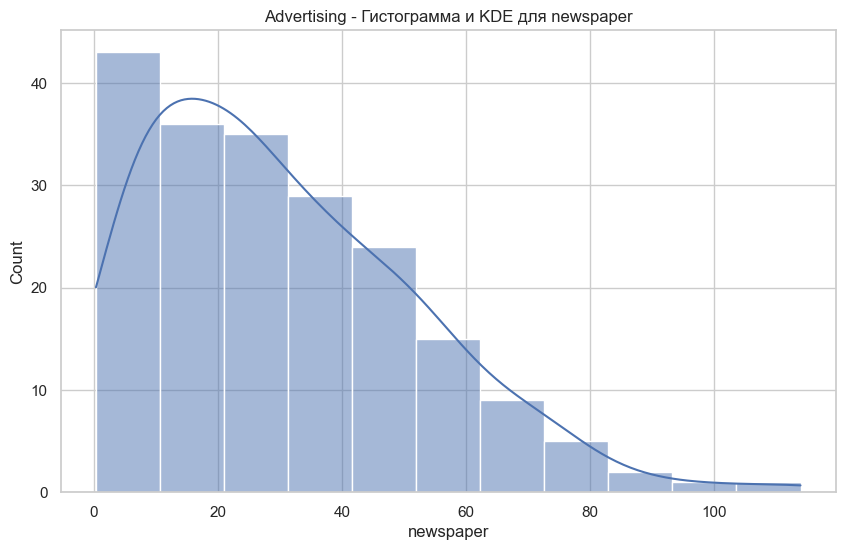

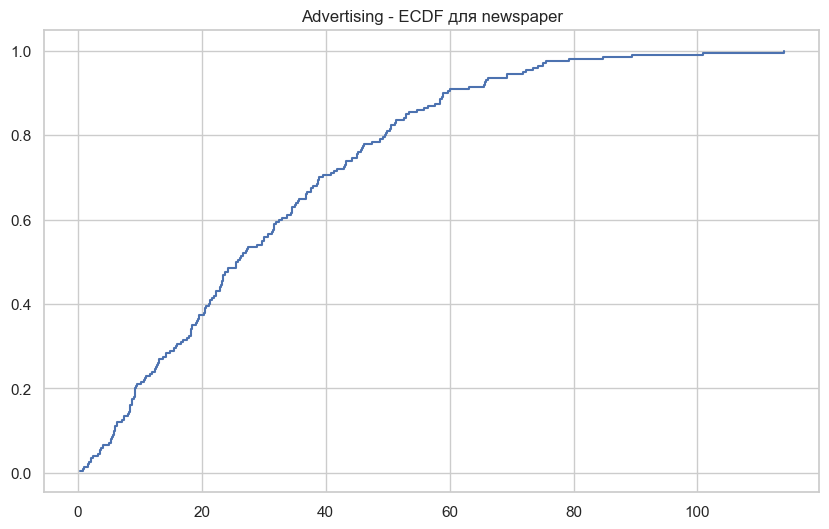

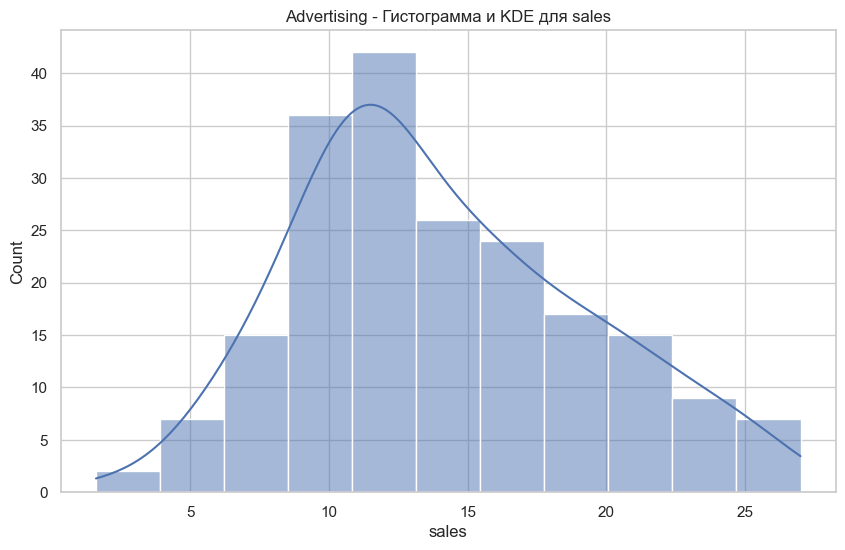

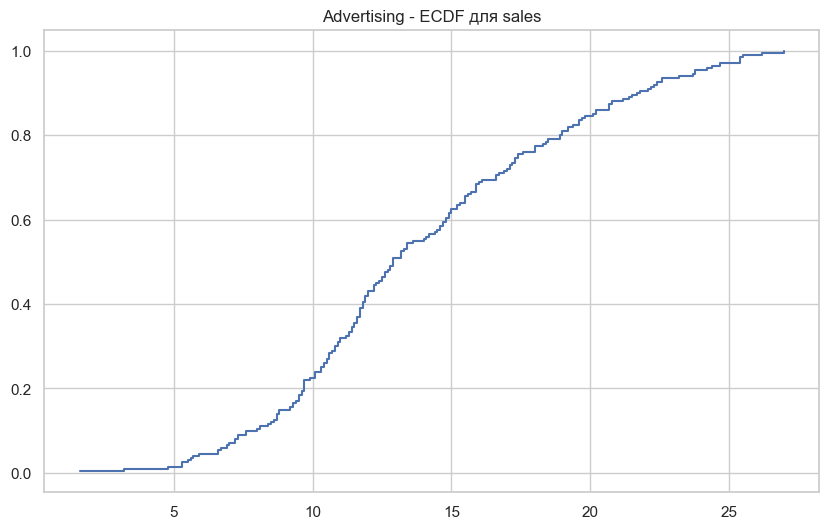

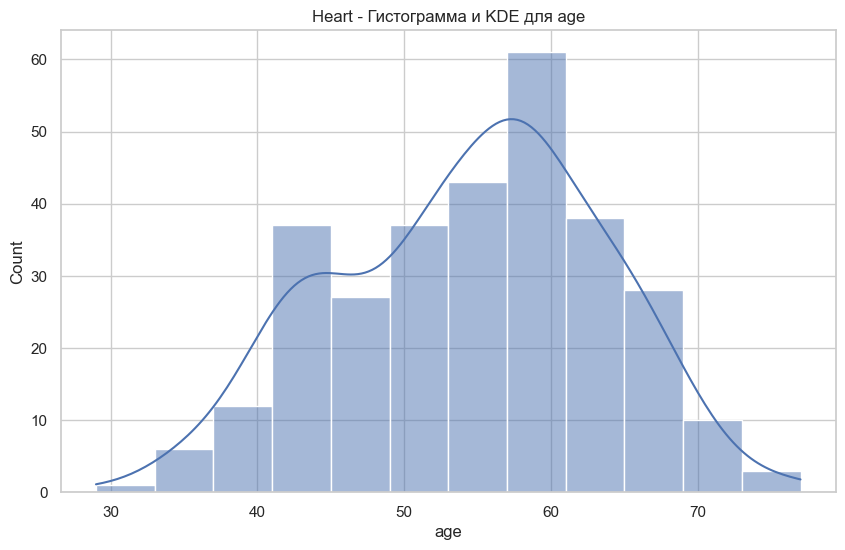

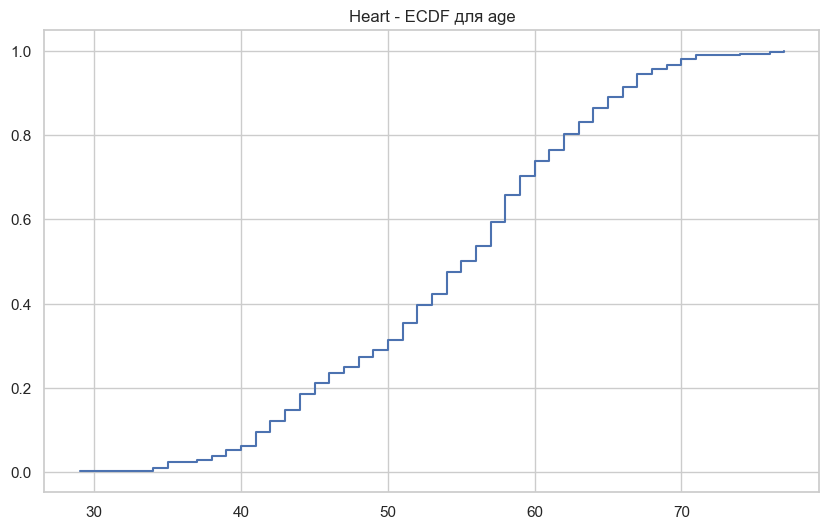

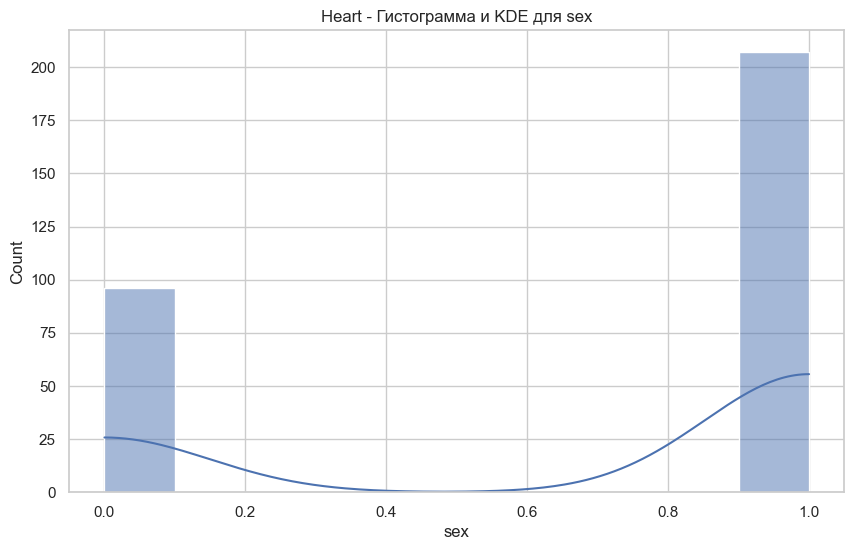

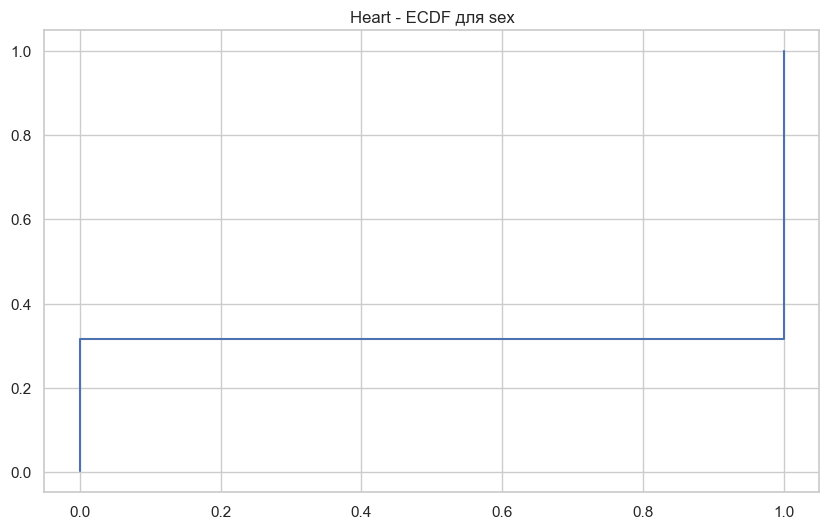

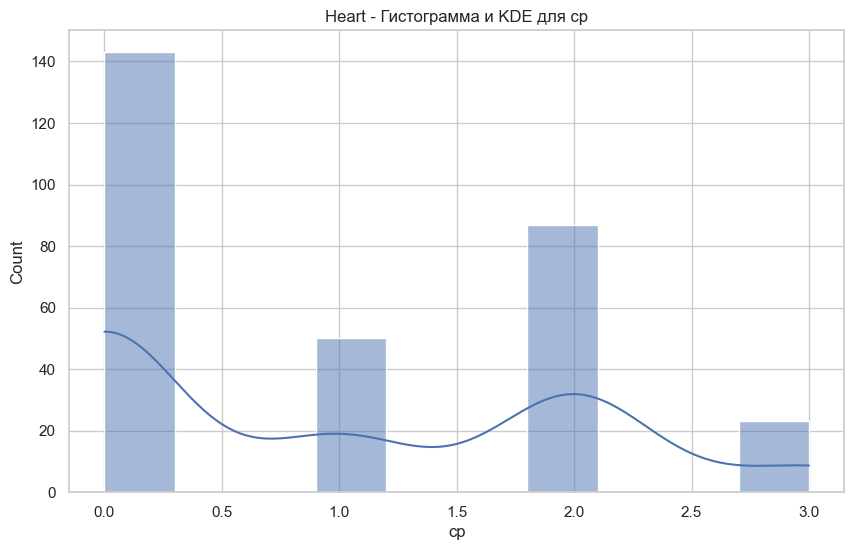

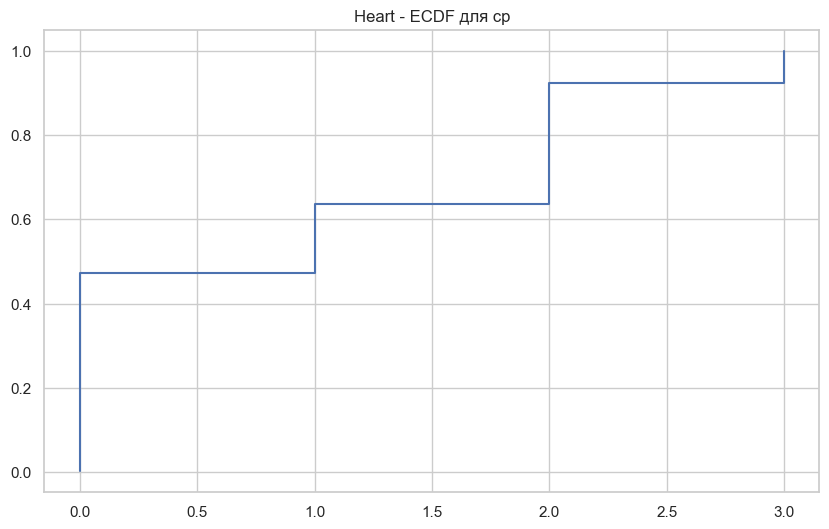

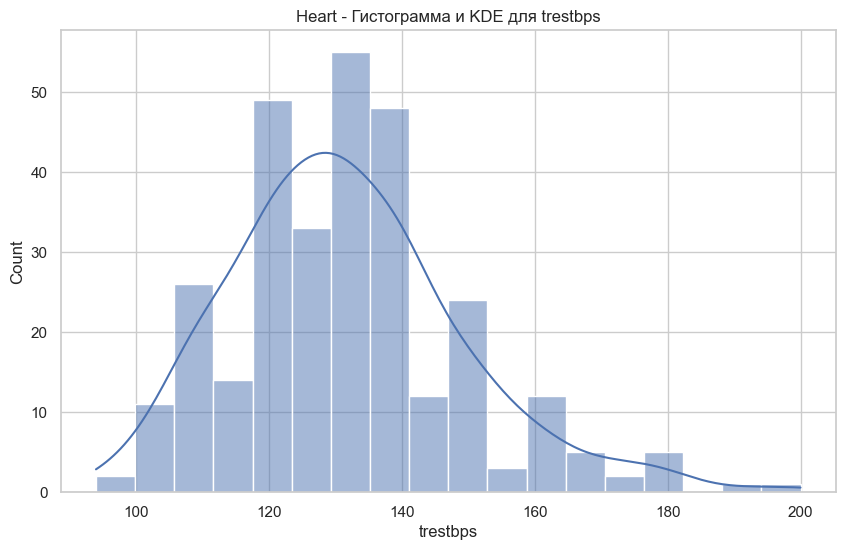

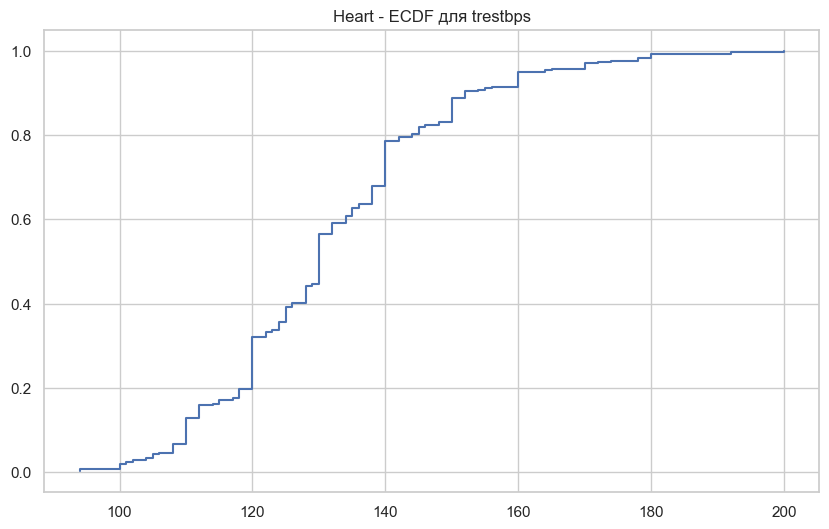

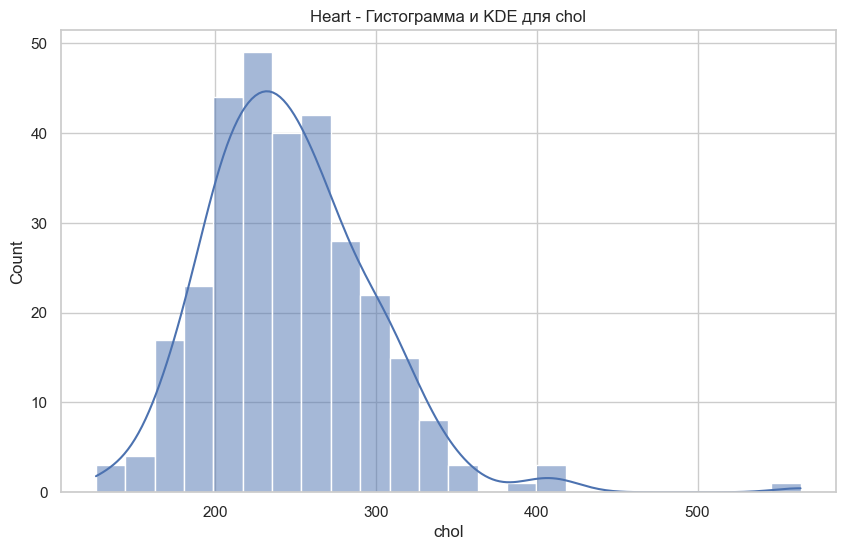

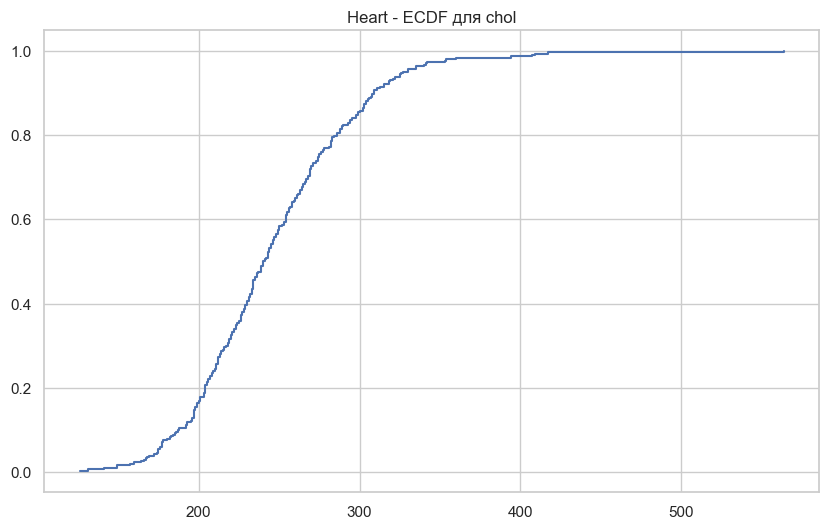

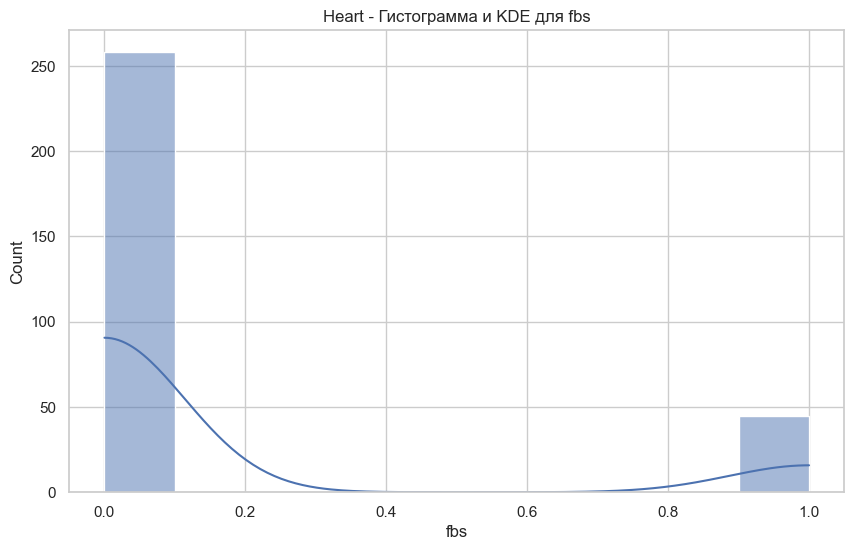

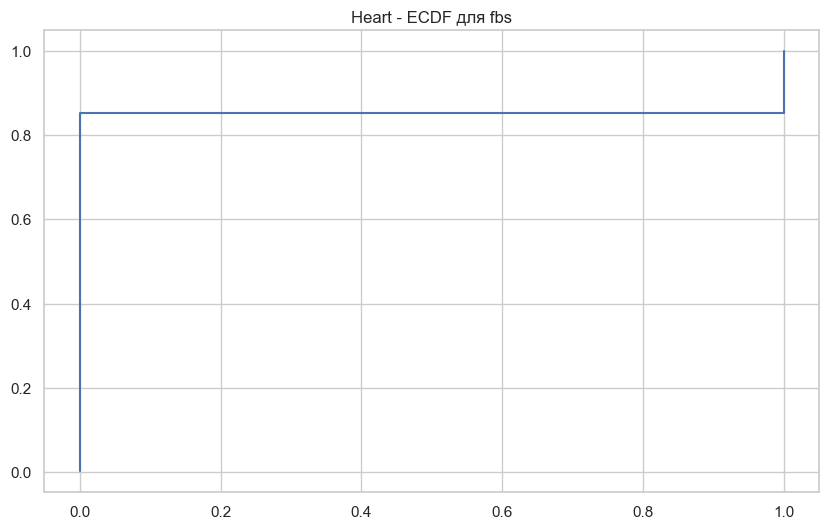

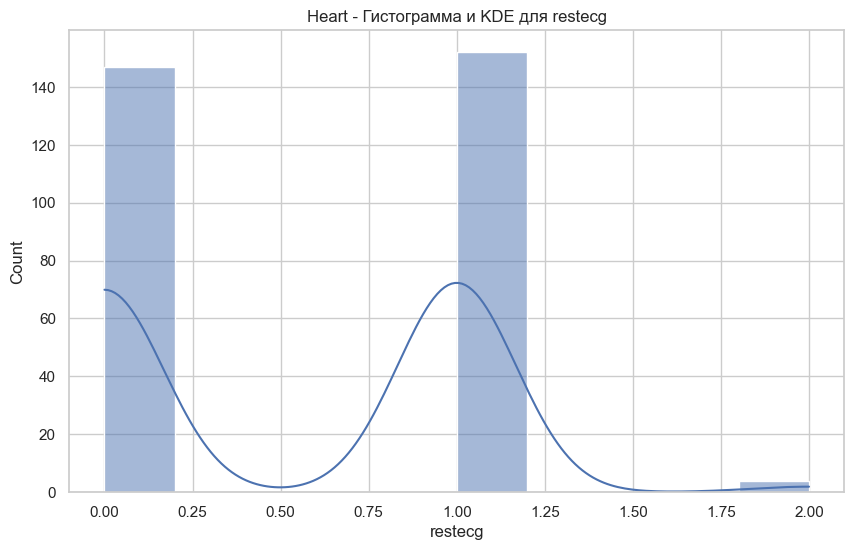

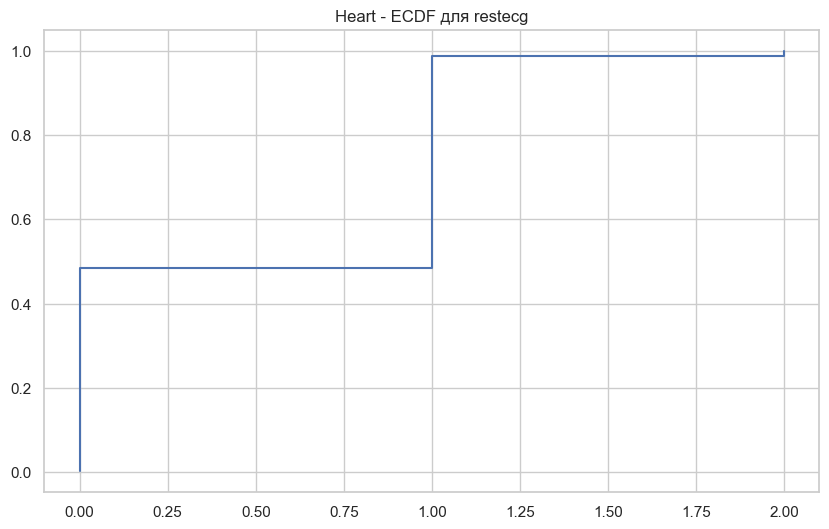

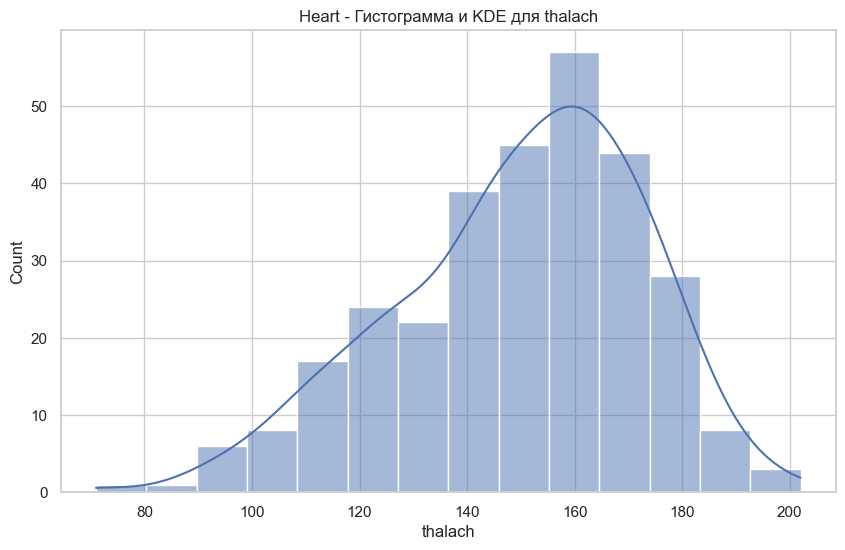

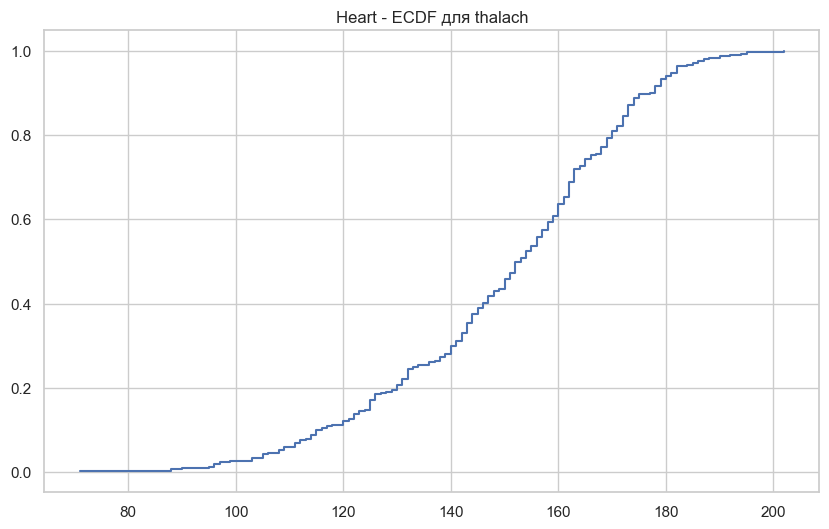

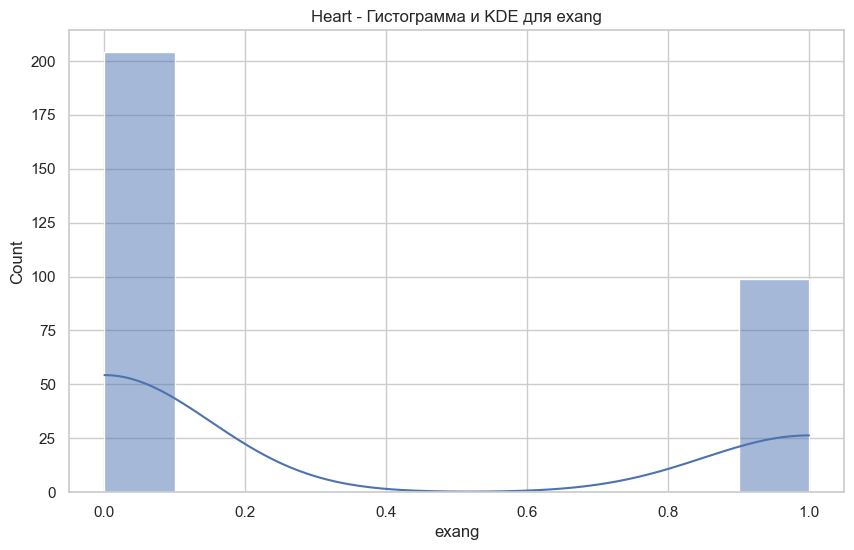

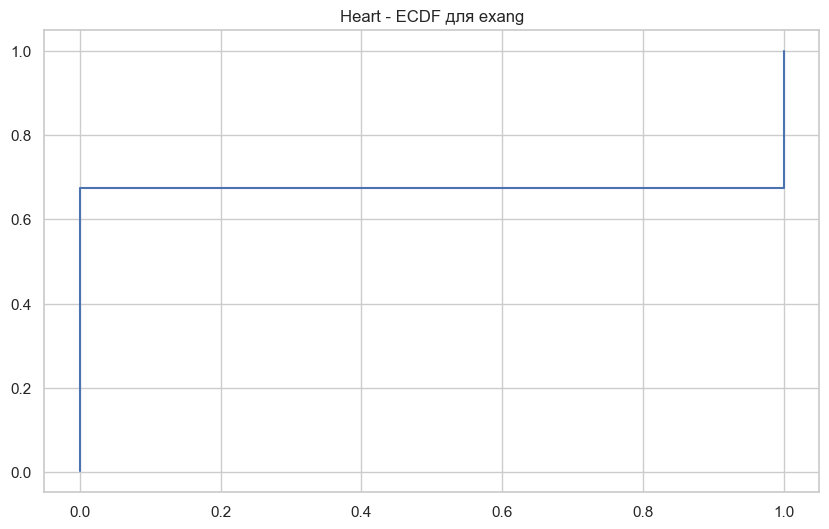

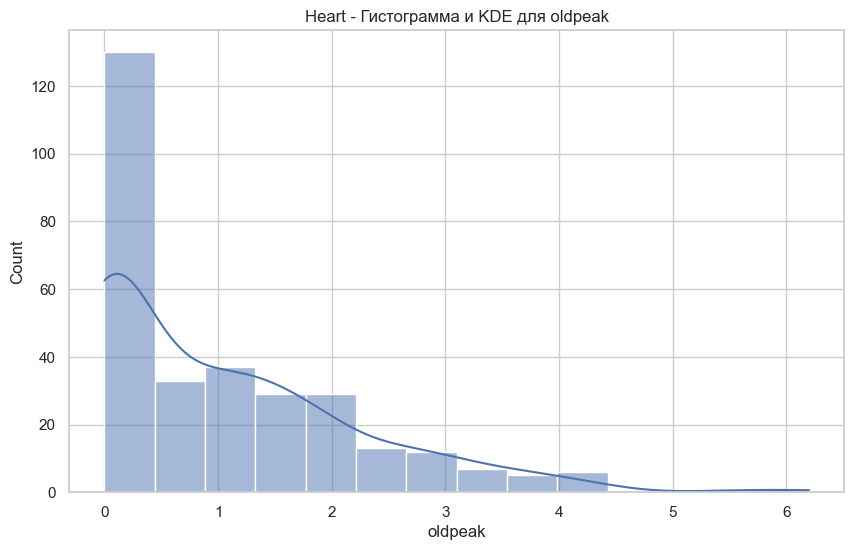

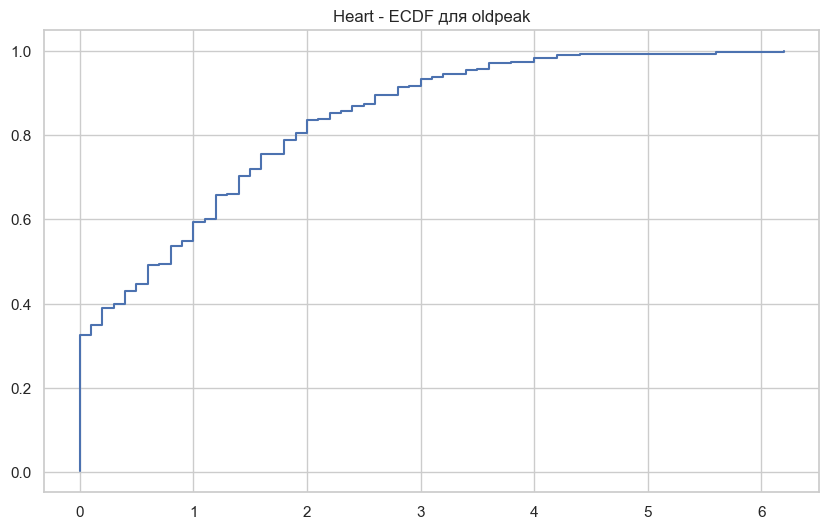

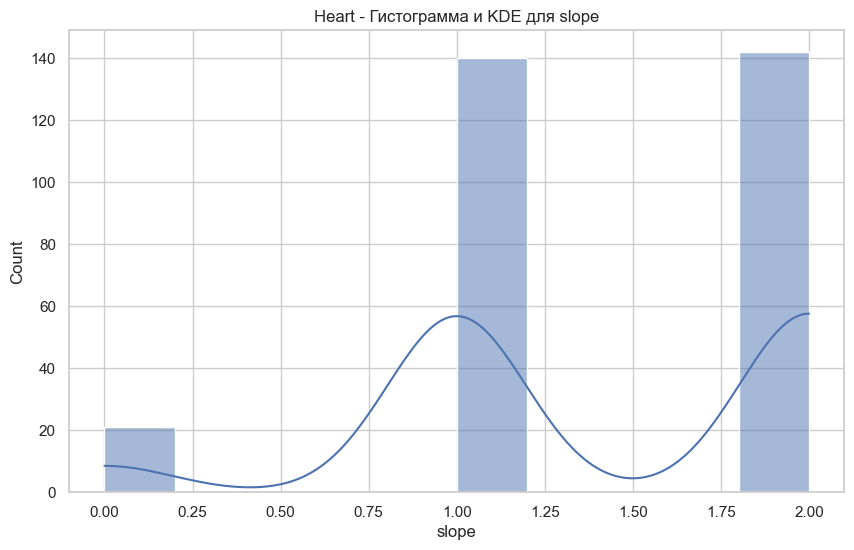

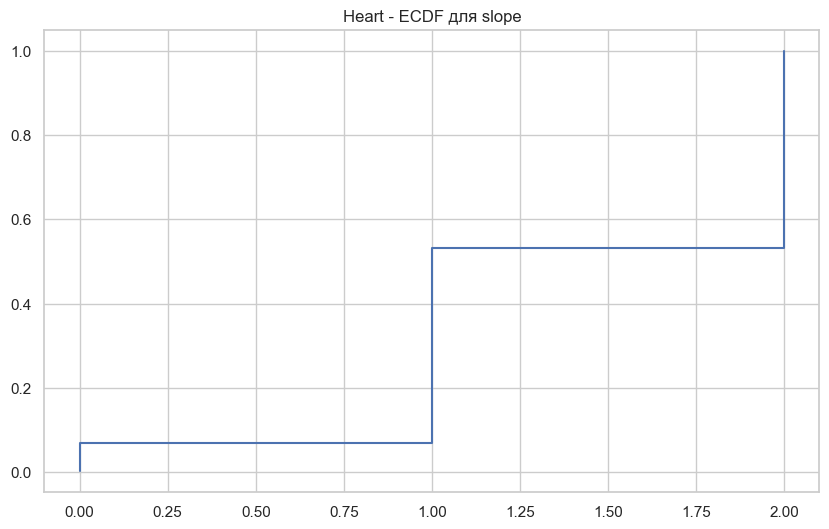

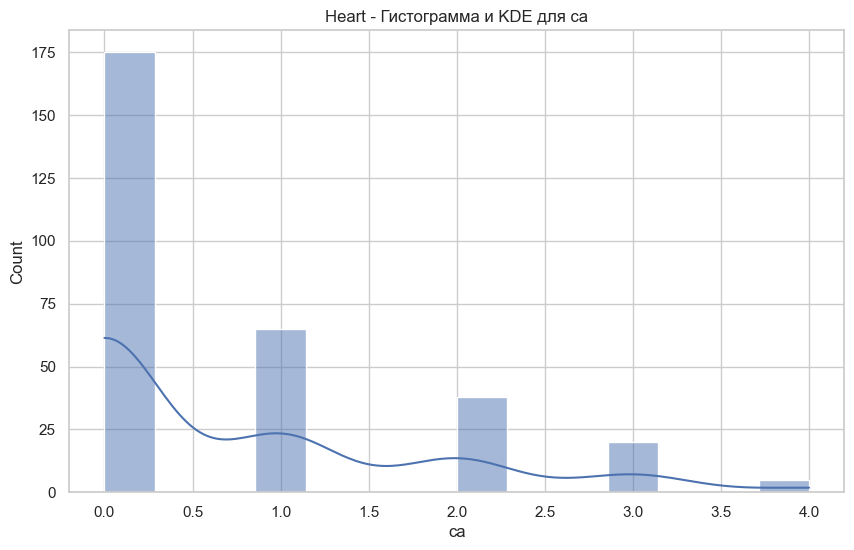

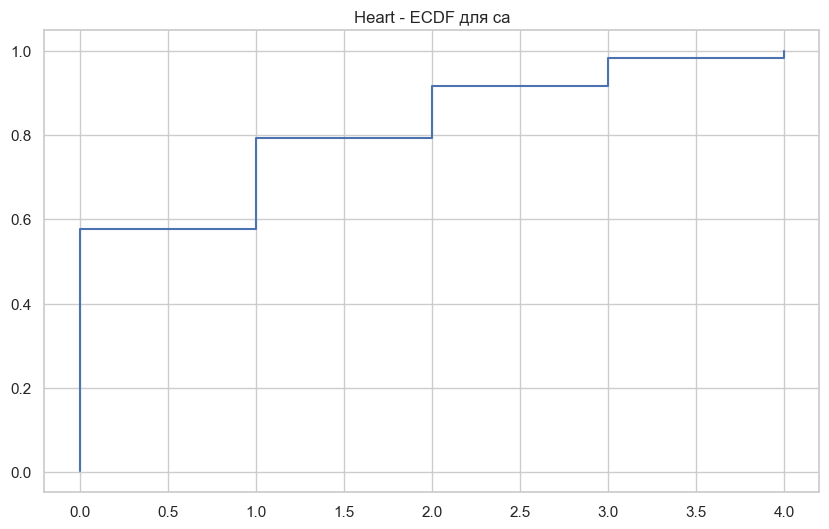

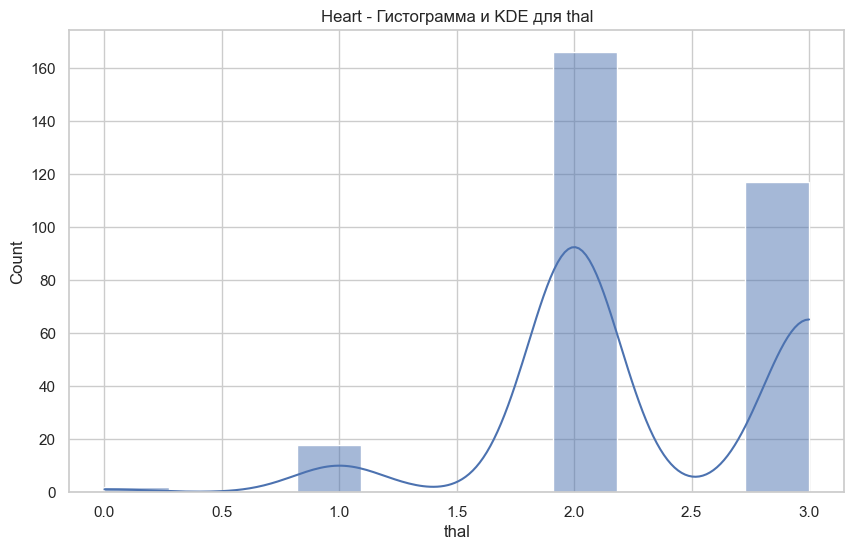

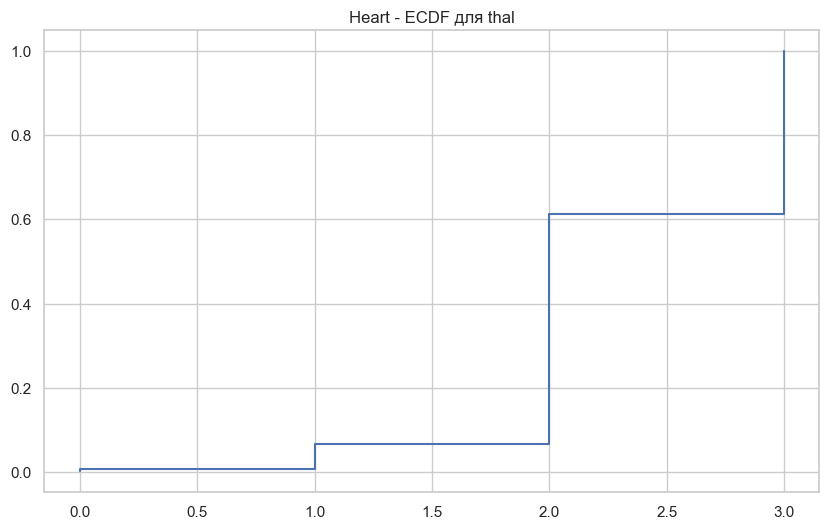

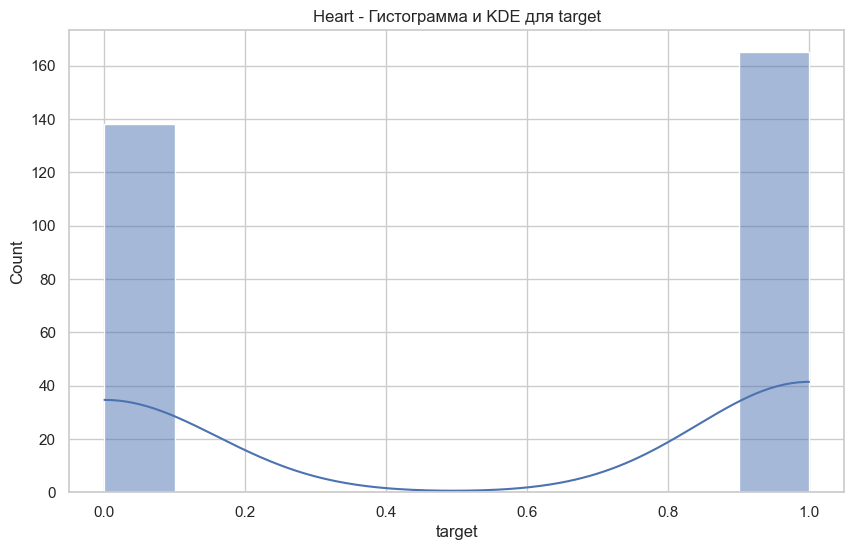

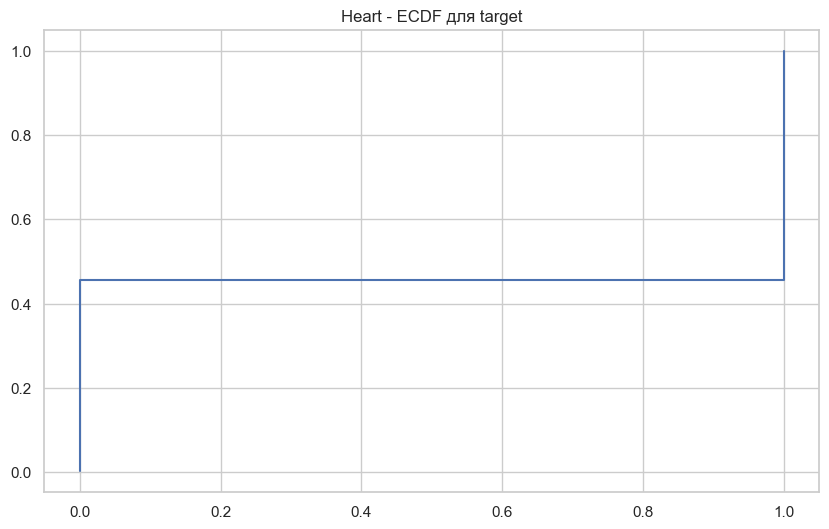

In [48]:
for name, data in zip(datasets["names"], datasets["data"]):
    for column in data.columns:
        plt.figure()
        sns.histplot(data[column], kde=True)
        plt.title(f"{name} - Гистограмма и KDE для {column}")
        plt.show()

        sorted_data = np.sort(data[column].dropna())
        y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.step(sorted_data, y, where="post")
        plt.title(f"{name} - ECDF для {column}")
        plt.show()


# Корреляционный анализ и тепловая карта

**Коэффициент корреляции Пирсона** измеряет линейную зависимость между двумя признаками.
Значение близкое к 1 или -1 указывает на сильную положительную или отрицательную связь соответственно, а близкое к 0 — на слабую связь.
$$r = \frac{\text{Cov}(x, y)}{\text{Std}(x) \cdot \text{Std}(y)}$$


**Тепловая карта** визуализирует корреляции в виде матрицы, где каждая ячейка окрашена в зависимости от силы корреляции.
Это упрощает анализ взаимосвязей между признаками.

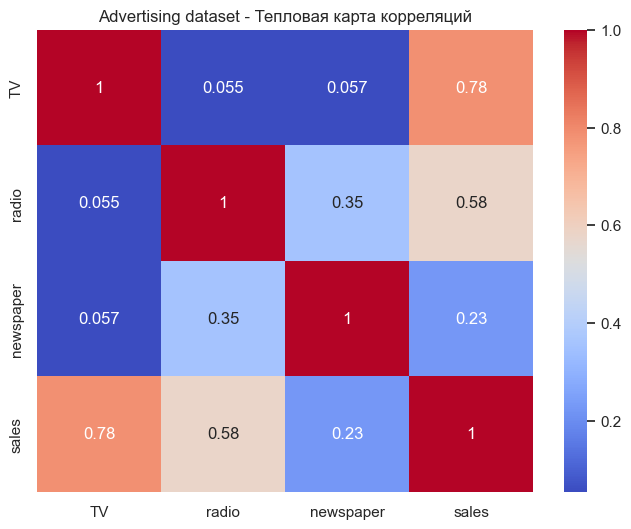

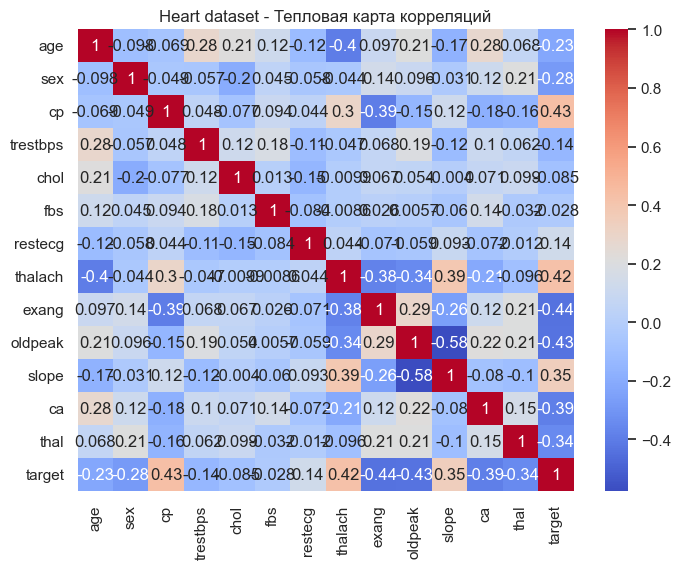

In [49]:
for name, data in zip(datasets["names"], datasets["data"]):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{name} dataset - Тепловая карта корреляций")
    plt.show()

# Извлечение новых признаков (feature extraction)
# Зачем нужно извлечение новых признаков

Извлечение новых признаков (feature extraction) – это процесс создания дополнительных переменных на основе существующих данных для улучшения работы алгоритмов машинного обучения.

## Важно, потому что:

### 1. **Повышение предсказательной способности модели**
Новые признаки могут лучше отражать скрытые закономерности в данных.

**Пример**: Логарифмирование выделяет относительные изменения в данных, полезно для работы с экспоненциальными зависимостями.

### 2. **Снижение влияния выбросов**
Трансформации, такие как логарифмирование или нормализация, уменьшают влияние крайних значений.

**Пример**: Логарифмирование стоимости товаров помогает уравновесить различия между дорогими и дешевыми объектами.

### 3. **Учет нелинейных зависимостей**
Некоторые алгоритмы плохо работают с линейными связями. Создание полиномиальных или комбинированных признаков может улучшить моделирование нелинейных зависимостей.

**Пример**: Умножение двух числовых признаков для учета их взаимодействия.

### 4. **Уменьшение размерности**
Извлечение новых признаков позволяет сжать данные без потери информации, что уменьшает размерность задачи.

**Пример**: Использование PCA (метод главных компонент) для создания новых признаков на основе линейных комбинаций старых.

### 5. **Приспособление к требованиям моделей**
Некоторые алгоритмы (например, линейная регрессия) требуют нормальности распределений. Трансформация признаков помогает моделям работать лучше.

**Пример**: Стандартизация признаков, чтобы они имели нулевое среднее и единичное стандартное отклонение.

In [50]:
# Логарифмирование затрат на рекламу в Advertising dataset.
advertising_data["log_TV"] = np.log1p(advertising_data["TV"])
advertising_data["log_radio"] = np.log1p(advertising_data["radio"])
advertising_data["log_newspaper"] = np.log1p(advertising_data["newspaper"])
print("\nAdvertising dataset с новыми признаками:\n")
print(advertising_data.head())

# Создаём новый признак: отношение максимального пульса к давлению в состоянии покоя
# Высокое значение этого показателя может указывать на хорошую адаптацию сердечно-сосудистой системы
# к физическим нагрузкам при относительно низком давлении в покое, а низкое — на возможные проблемы с сердцем или кровообращением.
heart_data["thalach_trestbps_ratio"] = heart_data["thalach"] / (heart_data["trestbps"] + 1e-5)
print("\nHeart dataset с новым признаком thalach_trestbps_ratio:\n")
print(heart_data.head())



Advertising dataset с новыми признаками:

      TV  radio  newspaper  sales    log_TV  log_radio  log_newspaper
0  230.1   37.8       69.2   22.1  5.442851   3.658420       4.251348
1   44.5   39.3       45.1   10.4  3.817712   3.696351       3.830813
2   17.2   45.9       69.3    9.3  2.901422   3.848018       4.252772
3  151.5   41.3       58.5   18.5  5.027165   3.744787       4.085976
4  180.8   10.8       58.4   12.9  5.202907   2.468100       4.084294

Heart dataset с новым признаком thalach_trestbps_ratio:

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6    

# Преобразование признаков (Feature Transformation)
# Что такое Z-score Scaling?

**Z-score Scaling** –  метод нормализации данных, при котором каждое значение признака x преобразуется таким образом, чтобы его распределение имело среднее значение 0 и стандартное отклонение 1.

### Формула преобразования:
$$
z = \frac{x - \mu}{\sigma}
$$


## Почему это важно?

1. **Приведение признаков к единому масштабу**
   - Алгоритмы, такие как логистическая регрессия, метод ближайших соседей и методы на основе градиентного спуска, чувствительны к масштабам признаков.
   - Преобразование гарантирует, что все признаки вносят равный вклад в модель.

2. **Стабильность численных вычислений**
   - Большие значения признаков могут привести к численным ошибкам или замедлению работы модели.

3. **Ускорение обучения**
   - Модели, использующие градиентный спуск, сходятся быстрее при работе с нормализованными данными.


# Зачем нужен Feature Transformation в целом?

Feature Transformation – это процесс преобразования исходных данных для улучшения работы моделей машинного обучения.



In [51]:
scaler = StandardScaler()

# Advertising dataset
print("\nAdvertising dataset до масштабирования:\n")
print(advertising_data.head())

# Отделяем признаки от целевой переменной
sales = advertising_data["sales"]
advertising_features = advertising_data.drop(columns=['sales'])

# Масштабируем признаки
advertising_scaled = pd.DataFrame(
    scaler.fit_transform(advertising_features),
    columns=advertising_features.columns
)

print("\nAdvertising dataset после масштабирования:\n")
print(advertising_scaled.head())

# Heart dataset
print("\nHeart dataset до масштабирования:\n")
print(heart_data.head())

# Определяем категориальные признаки
columns_not_to_scale = ["age", "sex", "cp", "restecg", "exang", "ca", "thal"]

# Отделяем признаки от целевой переменной
target = heart_data["target"]
heart_features = heart_data.drop(columns=['target'])

# Определяем столбцы для масштабирования
to_scale_cols = [col for col in heart_features.columns if col not in columns_not_to_scale]

# Масштабируем числовые признаки
scaled_values = scaler.fit_transform(heart_features[to_scale_cols])
heart_scaled_numeric = pd.DataFrame(scaled_values, columns=to_scale_cols, index=heart_features.index)

# Получаем непроизведённые к масштабированию признаки
non_scaled_features = heart_features[columns_not_to_scale]

# Объединяем масштабированные и немасштабированные признаки
heart_scaled = pd.concat([heart_scaled_numeric, non_scaled_features], axis=1)

print("\nHeart dataset после масштабирования:\n")
print(heart_scaled.head())

advertising_data, heart_data = advertising_scaled, heart_scaled


Advertising dataset до масштабирования:

      TV  radio  newspaper  sales    log_TV  log_radio  log_newspaper
0  230.1   37.8       69.2   22.1  5.442851   3.658420       4.251348
1   44.5   39.3       45.1   10.4  3.817712   3.696351       3.830813
2   17.2   45.9       69.3    9.3  2.901422   3.848018       4.252772
3  151.5   41.3       58.5   18.5  5.027165   3.744787       4.085976
4  180.8   10.8       58.4   12.9  5.202907   2.468100       4.084294

Advertising dataset после масштабирования:

         TV     radio  newspaper    log_TV  log_radio  log_newspaper
0  0.969852  0.981522   1.778945  0.781107   0.850789       1.270548
1 -1.197376  1.082808   0.669579 -0.911701   0.892779       0.784008
2 -1.516155  1.528463   1.783549 -1.866146   1.060674       1.272195
3  0.052050  1.217855   1.286405  0.348112   0.946397       1.079221
4  0.394182 -0.841614   1.281802  0.531172  -0.466897       1.077274

Heart dataset до масштабирования:

   age  sex  cp  trestbps  chol  fbs  reste

# Отбор признаков (Feature Selection)
Анализ выбросов, коррелирующих признаков и нерелевантных данных помогает улучшить модель, удаляя шум.
Сильно коррелирующие признаки могут дублировать информацию, что усложняет модель и снижает её точность.

## 1. **Матрица корреляций и отбор сильно коррелирующих признаков**

### Матрица корреляций
Матрица корреляций показывает взаимосвязь между признаками. Корреляция может быть вычислена с использованием формулы Пирсона.

После вычисления корреляций, для предотвращения мультиколлинеарности (сильно коррелирующие признаки) извлекается **верхняя треугольная часть матрицы корреляций**. Это делается с помощью маски, которая исключает повторяющиеся значения (например, корреляцию признака с самим собой).

Признаки, которые имеют корреляцию выше заданного порога, считаются сильно коррелирующими.

После этого из каждого набора сильно коррелирующих признаков удаляется один, чтобы избежать избыточности и улучшить модель.

## 2. **Анализ выбросов с использованием IQR (Interquartile Range)**

**IQR** — межквартильный размах, который измеряет разброс данных между 25-м и 75-м процентилем.

Формула для вычисления IQR:

$$
IQR = Q3 - Q1
$$

**Выбросы** определяются как значения, которые выходят за пределы интервала:

$$
\text{lower bound} = Q1 - 1.5 \times IQR
$$
$$
\text{upper bound} = Q3 + 1.5 \times IQR
$$

Значения, которые меньше нижней границы или больше верхней, считаются выбросами.

## 3. **Обнаружение аномалий с использованием Local Outlier Factor (LOF)**

**LOF (Local Outlier Factor)** — это метод, который оценивает локальную плотность объектов. Аномалии определяются как объекты, которые имеют значительно меньшую плотность по сравнению с их соседями.

Аномалии имеют высокое значение LOF, что означает, что их плотность значительно ниже, чем у соседних объектов.

## 4. **Отбор признаков**

После выполнения анализа выбросов и аномалий, необходимо произвести **отбор признаков**. Признаки, имеющие высокую взаимную корреляцию, часто избыточны и могут привести к **мультиколлинеарности** Мультиколлинеарность — это ситуация, когда один признак может быть предсказан с помощью других признаков, что делает модель менее стабильной и более склонной к переобучению.

Чтобы избежать этих проблем, мы удаляем один из сильно коррелирующих признаков, оставляя только те, которые представляют уникальную информацию. Это позволяет **уменьшить сложность модели** и сделать ее более **интерпретируемой**.



In [52]:
correlation_threshold = 0.8
new_data = []
for name, (data, out) in zip(["Advertising", "Heart"], [(advertising_data, sales), (heart_data, target)]):
    # 1. Матрица корреляций и отбор сильно коррелирующих признаков
    correlation_matrix = data.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
    print(f"\n{name} - Сильно коррелирующие признаки:", high_corr_features)

    # 2. Обнаружение выбросов с помощью IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_IQR = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    print(f"\n{name} - Обнаруженные выбросы с использованием IQR:")
    print(outliers_IQR.sum())

    # 3. Обнаружение аномалий с использованием Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.1)
    numeric_data = data.select_dtypes(include=[np.number])
    outliers_lof = lof.fit_predict(numeric_data)
    outliers_lof = (outliers_lof == -1)
    print(f"\n{name} - Обнаруженные аномалии (LOF):")
    print(np.sum(outliers_lof))

    # 4. Комбинированное обнаружение выбросов и аномалий
    mask_lof = pd.Series(outliers_lof, index=numeric_data.index)
    outliers_combined = outliers_IQR.any(axis=1) | mask_lof

    # 5. Удаление строк с выбросами и аномалиями
    cleaned_data = data[~outliers_combined]
    out = out[~outliers_combined]
    # 6. Отбор признаков: удаление сильно коррелирующих признаков
    high_corr_features = list(set(high_corr_features))
    cleaned_data = cleaned_data.drop(columns=high_corr_features, errors='ignore')

    # Вывод первых строк обновлённого набора данных
    print(f"\n{name} - Обновленный набор данных после удаления сильно коррелирующих признаков, выбросов и аномалий:")
    print(cleaned_data.head())
    new_data.append((cleaned_data, out))
(advertising_data, sales), (heart_data, target) = new_data


Advertising - Сильно коррелирующие признаки: ['log_TV', 'log_radio', 'log_newspaper']

Advertising - Обнаруженные выбросы с использованием IQR:
TV                0
radio             0
newspaper         2
log_TV           11
log_radio         3
log_newspaper     3
dtype: int64

Advertising - Обнаруженные аномалии (LOF):
20

Advertising - Обновленный набор данных после удаления сильно коррелирующих признаков, выбросов и аномалий:
         TV     radio  newspaper
0  0.969852  0.981522   1.778945
1 -1.197376  1.082808   0.669579
3  0.052050  1.217855   1.286405
4  0.394182 -0.841614   1.281802
6 -1.045577  0.643905  -0.324708

Heart - Сильно коррелирующие признаки: []

Heart - Обнаруженные выбросы с использованием IQR:
trestbps                   9
chol                       5
fbs                       45
thalach                    1
oldpeak                    8
slope                      0
thalach_trestbps_ratio     1
age                        0
sex                        0
cp           

In [56]:
ad_to_save = pd.concat([advertising_data, sales], axis=1)
heart_to_save = pd.concat([heart_data, target], axis=1)

In [61]:
heart_to_save

,trestbps,chol,fbs,thalach,oldpeak,slope,thalach_trestbps_ratio,age,sex,cp,restecg,exang,ca,thal,target
2,-0.092738,-0.816773,-0.417635,0.977514,0.310912,0.976352,0.705935,41,0,1,0,0,0,2,1
3,-0.663867,-0.198357,-0.417635,1.239897,-0.206705,0.976352,1.387992,56,1,1,1,0,0,2,1
4,-0.663867,2.082050,-0.417635,0.583939,-0.379244,0.976352,0.855988,57,0,0,1,1,0,2,1
5,0.478391,-1.048678,-0.417635,-0.072018,-0.551783,-0.649113,-0.425890,57,1,0,1,0,0,1,1
6,0.478391,0.922521,-0.417635,0.146634,0.224643,-0.649113,-0.273889,56,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.435415,-0.952051,-0.417635,-0.596784,-0.896862,-0.649113,-0.257218,63,0,0,1,1,0,2,0
298,0.478391,-0.101730,-0.417635,-1.165281,-0.724323,-0.649113,-1.185897,57,0,0,1,1,0,3,0
299,-1.234996,0.342756,-0.417635,-0.771706,0.138373,-0.649113,0.182115,45,1,3,1,0,0,3,0
301,-0.092738,-2.227533,-0.417635,-1.515125,0.138373,-0.649113,-1.160174,57,1,0,1,1,1,3,0


In [60]:
ad_to_save.to_csv("advertising_dataset.csv", index=False)
heart_to_save.to_csv("heart_dataset.csv", index=False)